<a href="https://colab.research.google.com/github/hardiksraja/DataScience_Learning/blob/master/Stats_ML_Linkage/Correlation_and_Relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistics alone cannot conclude anything. ALl the tests we do are based on relative liklihood**
* Here we will be seeing and visualizing different relationship between the features in a dataset. 
* Now a relationship can be linear,non_linear, monotonic or thre can be no relationship at all.
* We will also see how to assess the strength of the relatioship.
* Idea about polynomial and segmentation
* in real world scnario there is no linear relationship  but a curviliniar relationship 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/hardiksraja/DataScience_Learning/master/Stats_ML_Linkage/datasets/loan_analysis_summary.csv')

In [3]:
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


1. **fico_score** : it tells credit worthiness of an individual
* so when and individual wants to take a unsecured loan like home loan or credit for mortgagee the bank looks as your credit score.

* More fico score mean more cerdit worthiness and it typically ranges from 300 to 850
* banks essentially does not lend money to all fico score.
  * 650 and above score is considered as prime 
  * 500 and below is conisdered sub prime (higher interest rate in borrowing) 

2. **loan_total** : number of loans within that fico score
3. **default_total** : defaulted loan against the fico score. How many customer in this fico_score bucket has defaulted
4. **dti** *(depth to income ratio)* : how much depth the user have against the income (E.g., income of $1000 and depth of \$300 ==> dti = 30% ) This is average dti across the fico score
--------------------------------------------------------------
*Lower the fico_score , higher the int_rate in dataset People with better credit score will have better dti*

--------------------------------------------------------------
*For lower fico score default total will be a little higher*



The data set is a combination of discrete and continous variables.
**Loan total** and **Default_total** are countable value --> Discrete variable 
1. If you have any discrete variable and you want include it in any statistical function or regression or ANOVA model. You can decide whether you want to include it as a continous predictor or a categorical predictor.
2.
  * If the discrete values in the discrete varibale are low. Treat it as categorical predictor.
  * If the discrete values in the discrete varibale are high. Treat it as continuous predictor.

It all depends on how you want to represent that particular value and the test you are doing.

In [4]:
loan_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,16994.527778,3589.111111,18.790417,15088.569697,65678.583333,77391.960108,12.520384,2.777778,0.586645
std,105.356538,11917.752515,3512.765608,1.690671,1633.584599,6846.614297,8038.473538,2.560128,2.718690,0.574166
min,500.000000,124.000000,3.000000,14.676210,12994.231600,55000.000000,63396.102920,7.585562,0.002322,0.000490
25%,587.500000,10452.750000,214.250000,17.650570,14038.181180,61297.500000,72364.301710,10.453639,0.165818,0.035019
50%,675.000000,12519.500000,2886.500000,19.083851,14857.024775,63000.000000,74919.065440,13.556549,2.233995,0.471802
75%,762.500000,23774.500000,6123.750000,20.165171,15353.673887,68250.000000,80706.824483,14.732548,4.739451,1.000935
max,850.000000,40444.000000,10164.000000,20.974137,20082.459680,83750.000000,98683.805750,15.449011,7.866386,1.661319


In [5]:
loan_df.shape

(36, 10)

There are two ways to measure a relationship (i) Covariance (ii) Correlation

1. Covariance is not a standardized value
  * Covariance  : It is used to show the direction of the relationship. -ve covariance shows -ve relations and +ve shows +ve relationship.
  * Can range from + infinity to - infinity. 
  * The value of perfect relationsip in covariance is purely based on the data. No single correct way to conclude about the relationship. 
2. Correlation is standarized value between -1 and +1.
+1 : if there is prefect +ve relationship
-1 :  if ther is perfect -ve relationship

In [6]:
loan_df.cov()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,11100.000000,8.431757e+04,-3.281917e+05,-164.562715,1.179751e+05,6.540867e+05,7.851304e+05,-261.372425,-254.002627,-53.643365
loan_total,84317.571429,1.420328e+08,-6.117364e+06,2841.802408,-9.263903e+06,-1.233279e+07,-9.045332e+06,3454.737681,-4734.508923,-999.891190
default_total,-328191.714286,-6.117364e+06,1.233952e+07,5018.669412,-2.542762e+06,-1.726291e+07,-2.094780e+07,7646.662485,9550.122450,2016.911035
dti,-164.562715,2.841802e+03,5.018669e+03,2.858369,-2.164641e+03,-1.040763e+04,-1.219916e+04,4.167275,3.884179,0.820308
avg_loan_amnt,117975.085123,-9.263903e+06,-2.542762e+06,-2164.640693,2.668599e+06,9.564547e+06,1.092982e+07,-3359.878600,-1967.960087,-415.617751
median_annual_inc,654086.714286,-1.233279e+07,-1.726291e+07,-10407.631551,9.564547e+06,4.687613e+07,5.457827e+07,-16564.670539,-13360.560742,-2821.645746
avg_annual_inc,785130.353840,-9.045332e+06,-2.094780e+07,-12199.161949,1.092982e+07,5.457827e+07,6.461706e+07,-19471.216732,-16212.465719,-3423.945732
int_rate,-261.372425,3.454738e+03,7.646662e+03,4.167275,-3.359879e+03,-1.656467e+04,-1.947122e+04,6.554256,5.918103,1.249857
default_rate,-254.002627,-4.734509e+03,9.550122e+03,3.884179,-1.967960e+03,-1.336056e+04,-1.621247e+04,5.918103,7.391278,1.560980
actual_default_rate,-53.643365,-9.998912e+02,2.016911e+03,0.820308,-4.156178e+02,-2.821646e+03,-3.423946e+03,1.249857,1.560980,0.329667


1. Positive relationship between fico score and loan_total 
2. Negative relationship between fico score and dti

But here we are not getting the strength of the relationship.
Hence correlation is required.


In [7]:
loan_df.corr() # correlation is good measure to understand the relation.

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.067153,-0.886782,-0.923870,0.685468,0.906772,0.927058,-0.969029,-0.886782,-0.886782
loan_total,0.067153,1.000000,-0.146124,0.141039,-0.475837,-0.151144,-0.094418,0.113229,-0.146124,-0.146124
default_total,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
dti,-0.923870,0.141039,0.845046,1.000000,-0.783764,-0.899118,-0.897630,0.962789,0.845046,0.845046
avg_loan_amnt,0.685468,-0.475837,-0.443113,-0.783764,1.000000,0.855159,0.832335,-0.803379,-0.443113,-0.443113
median_annual_inc,0.906772,-0.151144,-0.717776,-0.899118,0.855159,1.000000,0.991677,-0.945029,-0.717776,-0.717776
avg_annual_inc,0.927058,-0.094418,-0.741849,-0.897630,0.832335,0.991677,1.000000,-0.946145,-0.741849,-0.741849
int_rate,-0.969029,0.113229,0.850278,0.962789,-0.803379,-0.945029,-0.946145,1.000000,0.850278,0.850278
default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
actual_default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000


1. Fico score and dti have negative correlation
1. Fico score and int_rate have negative correlation


-----------------------------------------------------------------------

Two types of correalation
1. **Pearson correlation**: Degree of relationship between linearly related value.
 It has assumption that both the variables should be normally distributed.
 If the distribution is not normal then pearson might give you strength bt it will not be that accurate
2. **Spearman rank correlation** : It is a non parametric test. It does not require the data to be normally distributed.
It used to calculate the degree of association between two variables.
It evaluates the monotonic relationship between a conitnuous variable or an ordinal variable. It does not have any assumptions about the underlying data.
Works pretty well if you have an variable having values which has order to it
In our example fico_score is ordinal variable. Also is more apporiate during modelling monolitic relationship


In [8]:
loan_df.corr(method = 'spearman')

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.043243,-0.939511,-0.936422,0.661261,0.956772,0.966281,-0.997169,-0.939511,-0.939511
loan_total,0.043243,1.000000,0.077992,0.029344,-0.344916,0.035934,0.048649,-0.035006,0.077992,0.077992
default_total,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
dti,-0.936422,0.029344,0.967310,1.000000,-0.576577,-0.877666,-0.890862,0.937709,0.967310,0.967310
avg_loan_amnt,0.661261,-0.344916,-0.601544,-0.576577,1.000000,0.750476,0.711969,-0.656371,-0.601544,-0.601544
median_annual_inc,0.956772,0.035934,-0.889429,-0.877666,0.750476,1.000000,0.979263,-0.955868,-0.889429,-0.889429
avg_annual_inc,0.966281,0.048649,-0.899871,-0.890862,0.711969,0.979263,1.000000,-0.966795,-0.899871,-0.899871
int_rate,-0.997169,-0.035006,0.950322,0.937709,-0.656371,-0.955868,-0.966795,1.000000,0.950322,0.950322
default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
actual_default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000


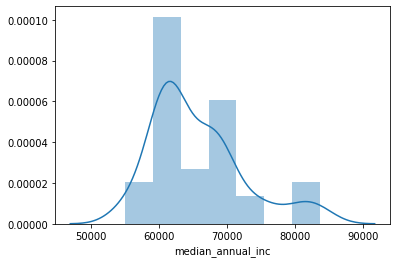

In [9]:
sns.distplot(loan_df['median_annual_inc'], hist=True)

Median_annual_inc is right skewed.

In [10]:
#pretty strong positive correlation
loan_df[['fico_score','median_annual_inc']].corr(method='spearman')

,fico_score,median_annual_inc
fico_score,1.000000,0.956772
median_annual_inc,0.956772,1.000000


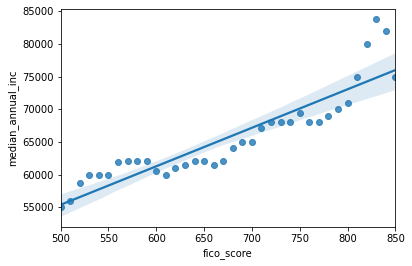

In [11]:
sns.regplot(x='fico_score', y = 'median_annual_inc', data =loan_df)

The points in above graph are not exactly on the line. Not a strong linear relationship but there is linear relatioship.

In [12]:
loan_df[['fico_score','avg_annual_inc']].corr(method ='spearman')

,fico_score,avg_annual_inc
fico_score,1.000000,0.966281
avg_annual_inc,0.966281,1.000000


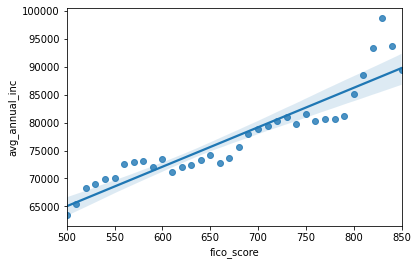

In [13]:
sns.regplot(x='fico_score' , y = 'avg_annual_inc' , data = loan_df)

In [14]:
loan_df[['fico_score','dti']].corr(method='spearman')

,fico_score,dti
fico_score,1.000000,-0.936422
dti,-0.936422,1.000000


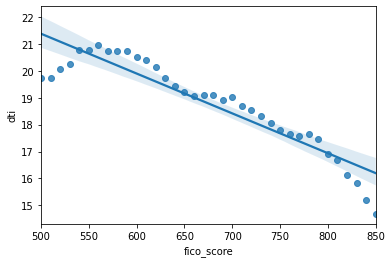

In [15]:
sns.regplot(x='fico_score', y='dti', data=loan_df)

In [16]:
loan_df[['fico_score','int_rate']].corr(method ='spearman')

,fico_score,int_rate
fico_score,1.000000,-0.997169
int_rate,-0.997169,1.000000


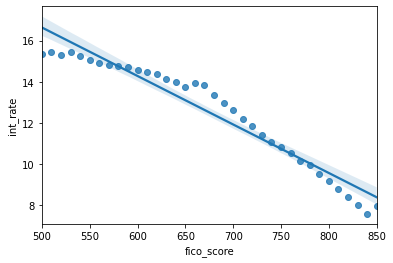

In [17]:
sns.regplot(x='fico_score' , y = 'int_rate' , data = loan_df)

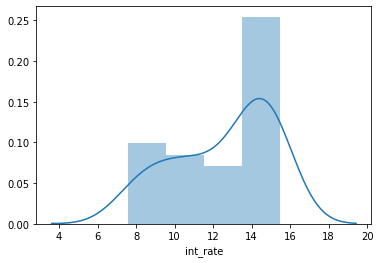

In [18]:
sns.distplot(loan_df['int_rate'], hist = True)

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([ 7.58556196,  7.96854839,  8.00050755,  8.40436779,  8.81612608,
          9.17925418,  9.54207879,  9.94439109, 10.17342593, 10.54704384,
         10.83639354, 11.07060021, 11.40585966, 11.84989813, 12.19602541,
         12.64158738, 12.99737662, 13.36212073, 13.75097687, 13.84232878,
         13.93910593, 13.99130432, 14.13094166, 14.38872081, 14.45885661,
         14.56445333, 14.71287103, 14.79158065, 14.83095961, 14.93735761,
         15.04

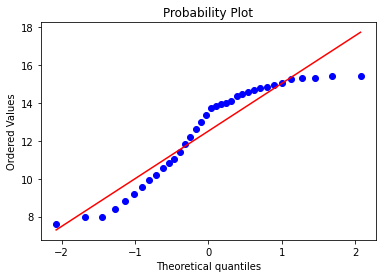

In [19]:
import scipy.stats as stats
stats.probplot(loan_df['int_rate'], dist='norm', plot=plt)

It is a quantile plot. It is a good way check if the distribution is normal or not.
If all the points lie on the red line then we can assume that data is perfectly nornally distributed.
In our case it is not perfectly normally distributed.

In [21]:
loan_df[['fico_score','loan_total']].corr(method='spearman')

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


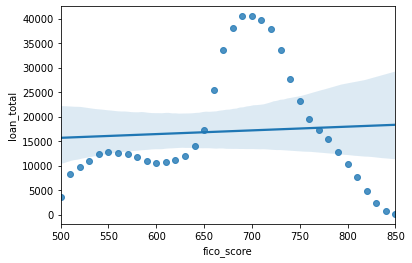

In [22]:
sns.regplot(x='fico_score', y='loan_total', data=loan_df)

For these two variables the relationship is not linear.
It can be handled using a complex/non linear model or high order polynomial model.

In [24]:
print(loan_df[['fico_score','default_rate']].corr())

              fico_score  default_rate
fico_score      1.000000     -0.886782
default_rate   -0.886782      1.000000


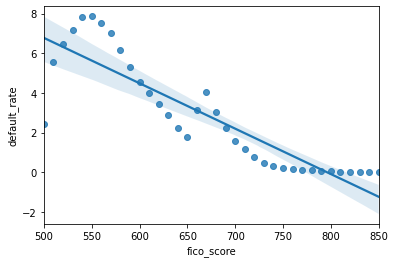

In [25]:
sns.regplot(x='fico_score' , y = 'default_rate' , data = loan_df)

              fico_score  default_rate
fico_score      1.000000     -0.939511
default_rate   -0.939511      1.000000


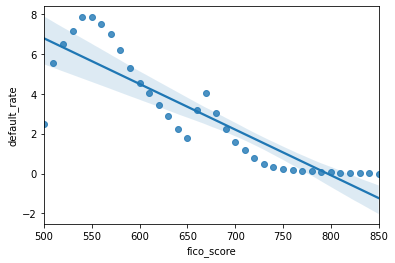

In [23]:
print(loan_df[['fico_score','default_rate']].corr(method ='spearman'))
sns.regplot(x='fico_score' , y = 'default_rate' , data = loan_df)

* Here there is negative correltions but many points are away from the regression line. It is called **monotonic relationship**.

*Monotonic relationships are where: One variable increases and the other increases. Or, One variable decreases and the other decreases*

* In this case,  the variables tend to move in relatively same direction but they are not moving in the same constant rate as a perfect linear relation.
* here we can use linear as well as complex/non linear model or we use segmentation i.e., create sepearte groups for different fico score and train a different model for each group.

If we use all fico score and create one model it may generalize the coeff of model and hence create a biasness in model.

*Linear relationship are also monotonic*

                   median_annual_inc  loan_total
median_annual_inc           1.000000    0.035934
loan_total                  0.035934    1.000000


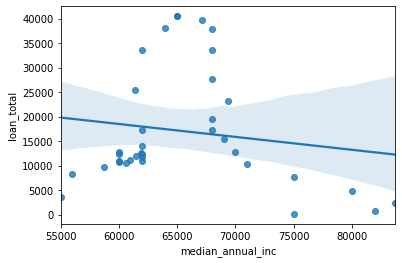

In [0]:
print(loan_df[['median_annual_inc','loan_total']].corr(method ='spearman'))
sns.regplot(x='median_annual_inc' , y = 'loan_total' , data = loan_df)

                 dti  loan_total
dti         1.000000    0.029344
loan_total  0.029344    1.000000


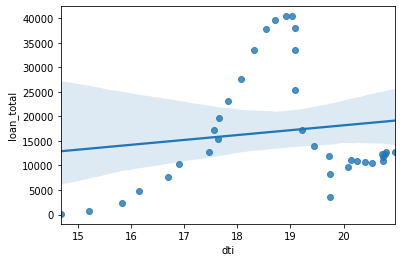

In [26]:
print(loan_df[['dti','loan_total']].corr(method ='spearman'))
sns.regplot(x='dti' , y = 'loan_total' , data = loan_df)